# Processor temperature

We have a temperature sensor in the processor of our company's server. We want to analyze the data provided to determinate whether we should change the cooling system for a better one. It is expensive and as a data analyst we cannot make decisions without a basis.

We provide the temperatures measured throughout the 24 hours of a day in a list-type data structure composed of 24 integers:
```
temperatures_C = [33,66,65,0,59,60,62,64,70,76,80,69,80,83,68,79,61,53,50,49,53,48,45,39]
```

## Goals

1. Treatment of lists
2. Use of loop or list comprenhention
3. Calculation of the mean, minimum and maximum.
4. Filtering of lists.
5. Interpolate an outlier.
6. Logical operators.
7. Print

## Temperature graph
To facilitate understanding, the temperature graph is shown below. You do not have to do anything in this section. The test starts in **Problem**.

Text(0.5, 1.0, 'Temperatures of our server throughout the day')

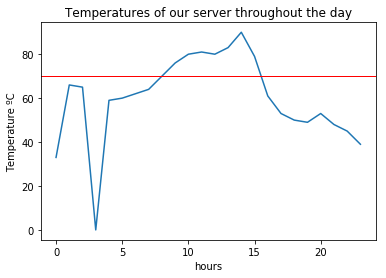

In [1]:
# import
import matplotlib.pyplot as plt
%matplotlib inline

# axis x, axis y
y = [33,66,65,0,59,60,62,64,70,76,80,81,80,83,90,79,61,53,50,49,53,48,45,39]
x = list(range(len(y)))

# plot
plt.plot(x, y)
plt.axhline(y=70, linewidth=1, color='r')
plt.xlabel('hours')
plt.ylabel('Temperature ºC')
plt.title('Temperatures of our server throughout the day')

## Problem

If the sensor detects more than 4 hours with temperatures greater than or equal to 70ºC or any temperature above 80ºC or the average exceeds 65ºC throughout the day, we must give the order to change the cooling system to avoid damaging the processor.

We will guide you step by step so you can make the decision by calculating some intermediate steps:

1. Minimum temperature
2. Maximum temperature
3. Temperatures equal to or greater than 70ºC
4. Average temperatures throughout the day.
5. If there was a sensor failure at 03:00 and we did not capture the data, how would you estimate the value that we lack? Correct that value in the list of temperatures.
6. Bonus: Our maintenance staff is from the United States and does not understand the international metric system. Pass temperatures to Degrees Fahrenheit.

Formula: F = 1.8 * C + 32

web: https://en.wikipedia.org/wiki/Conversion_of_units_of_temperature


In [2]:
# assign a variable to the list of temperatures

# 1. Calculate the minimum of the list and print the value using print()


# 2. Calculate the maximum of the list and print the value using print()


# 3. Items in the list that are greater than 70ºC and print the result


# 4. Calculate the mean temperature throughout the day and print the result


# 5.1 Solve the fault in the sensor by estimating a value


# 5.2 Update of the estimated value at 03:00 on the list



# Bonus: convert the list of ºC to ºFarenheit



## Take the decision
Remember that if the sensor detects more than 4 hours with temperatures greater than or equal to 70ºC or any temperature higher than 80ºC or the average was higher than 65ºC throughout the day, we must give the order to change the cooling system to avoid the danger of damaging the equipment:
* more than 4 hours with temperatures greater than or equal to 70ºC
* some temperature higher than 80ºC
* average was higher than 65ºC throughout the day
If any of these three is met, the cooling system must be changed.


In [3]:
# Print True or False depending on whether you would change the cooling system or not



## Future improvements
1. We want the hours (not the temperatures) whose temperature exceeds 70ºC
2. Condition that those hours are more than 4 consecutive and consecutive, not simply the sum of the whole set. Is this condition met?
3. Average of each of the lists (ºC and ºF). How they relate?
4. Standard deviation of each of the lists. How they relate?


In [4]:
# 1. We want the hours (not the temperatures) whose temperature exceeds 70ºC



In [5]:
# 2. Condition that those hours are more than 4 consecutive and consecutive, not simply the sum of the whole set. Is this condition met?



In [6]:
# 3. Average of each of the lists (ºC and ºF). How they relate?



In [7]:
# 4. Standard deviation of each of the lists. How they relate?



In [2]:
tempC = [33,66,65,0,59,60,62,64,70,76,80,69,80,83,68,79,61,53,50,49,53,48,45,39]
tempF = []
higher = []
mean = 0
alarm = False

print("The minimum temperature is", min(tempC))
print("The maximum temperature is", max(tempC))
for temp in tempC:
    if temp >= 70: higher.append(temp)
    if temp > 80: alarm = True
    mean += temp/(len(tempC)-1)
    tempF.append(int(temp*1.8+32))
if alarm == True: print("At least one of the temperatures is above 80.")
print("The temperatures above acceptable are", higher, "by a total of", len(higher), "times.")
if len(higher) > 4: alarm = True
print("The mean temperature is", mean)
if mean > 65: alarm = True
if alarm == True: print("We must change the cooling system!")
print("The missing value at 03:00 will be replaced by the mean of the temperatures.")
tempC[3] = int(mean)
tempF[3] = int(mean*1.8+32)
print("The complete list of temperatures is now:\n", tempC)
print("And in fahrenheit they read as:\n", tempF)

The minimum temperature is 0
The maximum temperature is 83
At least one of the temperatures is above 80.
The temperatures above acceptable are [70, 76, 80, 80, 83, 79] by a total of 6 times.
The mean temperature is 61.39130434782609
We must change the cooling system!
The missing value at 03:00 will be replaced by the mean of the temperatures.
The complete list of temperatures is now:
 [33, 66, 65, 61, 59, 60, 62, 64, 70, 76, 80, 69, 80, 83, 68, 79, 61, 53, 50, 49, 53, 48, 45, 39]
And in fahrenheit they read as:
 [91, 150, 149, 142, 138, 140, 143, 147, 158, 168, 176, 156, 176, 181, 154, 174, 141, 127, 122, 120, 127, 118, 113, 102]


In [5]:
from math import sqrt

tempC = [33,66,65,0,59,60,62,64,70,76,80,69,80,83,68,79,61,53,50,49,53,48,45,39]
tempF = []
hours = []
fahrenheit = 0
averageC = 0
averageF = 0
deviationC = 0
deviationF = 0
oldtemp = 0
consecutive = 0
h = 0
alarm = False

for temp in tempC:
    if temp >= 70:
        hours.append(h)
        if oldtemp >= 70: consecutive += 1
        else: consecutive = 0
    if consecutive > 4: alarm = True
    fahrenheit = int(temp*1.8+32)
    tempF.append(fahrenheit)
    averageC += temp/(len(tempC)-1)
    averageF += fahrenheit/(len(tempC)-1)
    oldtemp = temp
    h += 1
if alarm == True: print("The new condition is met.")
else: print("The new condition isn't met.")
print("The temperature exceeds the acceptable at these hours:", hours)
print("The average temperature in Celsius is", averageC, "and the average temperature in Fahrenheit is", averageF)
print("They relate in a way that converting the average Celsius temperature to Fahrenheit gives you", averageC*1.8+32, "that is almost the same value for the average Farenheit temperature.")
for k in tempC: deviationC += (k-averageC)**2
deviationC = sqrt(deviationC/(len(tempC)-1))
for k in tempF: deviationF += (k-averageF)**2
deviationF = sqrt(deviationF/(len(tempF)-1))
print("The the deviation for Celsius is", averageC, "and the deviation for Fahrenheit is", averageF, "and they relate the same way the average does.")

The new condition isn't met.
The temperature exceeds the acceptable at these hours: [8, 9, 10, 12, 13, 15]
The average temperature in Celsius is 61.39130434782609 and the average temperature in Fahrenheit is 143.6086956521739
They relate in a way that converting the average Celsius temperature to Fahrenheit gives you 142.50434782608698 that is almost the same value for the average Farenheit temperature.
The the deviation for Celsius is 61.39130434782609 and the deviation for Fahrenheit is 143.6086956521739 and they relate the same way the average does.
